<a href="https://colab.research.google.com/github/vmpreciado/NETS3120/blob/main/CommunitiesMDSshortest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, first, we'll generate a matrix M that represents the shortest-path distances between nodes in the Zachary's karate club network using NetworkX. Then, we'll apply Multidimensional Scaling (MDS) to generate a matrix X of positions from the distance matrix M. Note that for the MDS part, we'll use the sklearn.manifold.MDS module.

First, ensure you have NetworkX installed in your Python environment. If not, you can install it using pip:

In [1]:
pip install networkx

Here's how you can load the Zachary's karate club network and calculate the shortest-path distance matrix:

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from networkx.algorithms.community import modularity
from networkx.algorithms.community import greedy_modularity_communities
from mpl_toolkits.mplot3d import Axes3D

# Load Zachary's karate club network
G = nx.karate_club_graph()

# Calculate the shortest-path distance matrix
length = dict(nx.all_pairs_shortest_path_length(G))
N = len(G.nodes())
M = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        M[i, j] = length[i][j]

print(M)

[[0. 1. 1. ... 1. 2. 2.]
 [1. 0. 1. ... 2. 2. 2.]
 [1. 1. 0. ... 2. 1. 2.]
 ...
 [1. 2. 2. ... 0. 1. 1.]
 [2. 2. 1. ... 1. 0. 1.]
 [2. 2. 2. ... 1. 1. 0.]]


For this part, ensure you have scikit-learn installed. If not, you can install it using pip:

In [3]:
pip install scikit-learn

Now, apply Multidimensional Scaling (MDS) to the distance matrix M to generate a matrix of positions X:

In [4]:
# Initialize MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, normalized_stress='auto')

# Apply MDS to the distance matrix M to get the 2D positions matrix X
X = mds.fit_transform(M)

print(X)

[[-0.40194964 -0.9118373 ]
 [-1.04712368 -0.34275059]
 [ 0.0164895  -0.09522484]
 [-0.07767798 -0.85421326]
 [-0.15876015 -2.00887212]
 [-0.92454855 -1.93470442]
 [-0.2593209  -2.13575664]
 [-0.79781719 -0.71294827]
 [-0.40941366  0.41244168]
 [-0.62180473  1.24790122]
 [-0.70536607 -1.90360604]
 [-2.06515109 -0.80695738]
 [ 0.51100316 -1.95501971]
 [-0.2445434  -0.07426852]
 [ 0.89355429  1.98698147]
 [-0.13018889  2.12907829]
 [-1.01994666 -3.08967144]
 [-1.77570683 -0.96934839]
 [ 1.52409684  1.53934401]
 [-0.96168319  0.31047306]
 [-0.53597391  2.11834436]
 [-1.54000085 -1.31087062]
 [ 1.21574692  1.75207498]
 [ 1.72226075  1.01716177]
 [ 1.92721348 -0.64903505]
 [ 2.05148467 -0.40250007]
 [ 0.34776869  2.3190946 ]
 [ 1.28806652  0.29422509]
 [ 0.86715297  0.3713628 ]
 [ 0.59579171  1.89820367]
 [-0.86739846  0.96077138]
 [ 0.75794509 -0.27119224]
 [ 0.49693929  0.99900004]
 [ 0.32886196  1.07231847]]


This code will output a 2D positions matrix X where each row represents the 2D coordinates of a node in the network. The n_components=2 parameter specifies that we want to reduce the dimensions to 2, which is typical for visualization purposes. The dissimilarity='precomputed' parameter is used because we are providing a precomputed distance matrix.

Finally, we'll visualize the network in a two-dimensional space using the positions obtained from MDS.

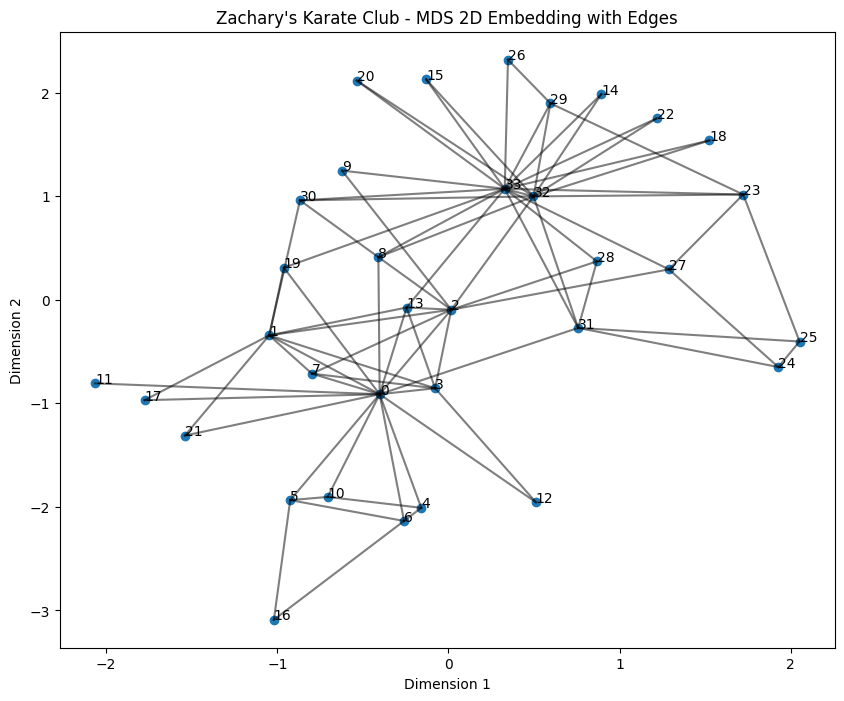

In [5]:
# Plot the graph with edges
plt.figure(figsize=(10, 8))

# Plot the edges
for edge in G.edges():
    start_pos, end_pos = X[edge[0]], X[edge[1]]
    plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-', alpha=0.5)

# Plot the nodes
plt.scatter(X[:, 0], X[:, 1])

# Label the points with their corresponding node numbers
for i, txt in enumerate(G.nodes()):
    plt.annotate(txt, (X[i, 0], X[i, 1]))

plt.title("Zachary's Karate Club - MDS 2D Embedding with Edges")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

To group the nodes into classes based on their locations defined by the matrix X obtained from Multidimensional Scaling (MDS), we can use the K-means clustering algorithm. K-means will partition the nodes into k clusters where each node belongs to the cluster with the nearest mean location. The number of clusters k is a parameter that you need to specify. For the sake of demonstration, let's assume we want to divide the nodes into two clusters (which might represent two communities within the Zachary's Karate Club network).

Here's how you can perform K-means clustering on the nodes based on their 2D locations from X:

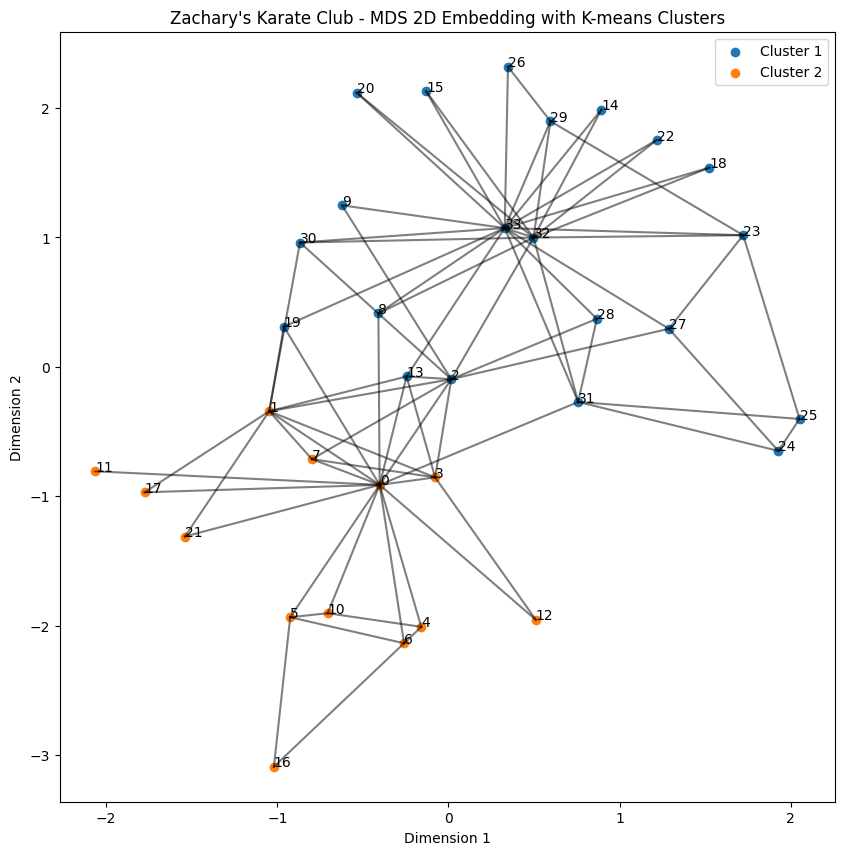

In [6]:
# Number of clusters
k = 2

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Plot the clustered graph
plt.figure(figsize=(10, 10))

# Plot the edges first to keep them in the background
for edge in G.edges():
    start_pos, end_pos = X[edge[0]], X[edge[1]]
    plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-', alpha=0.5)

# Plot the nodes, colored by their cluster membership
for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i+1}')

# Label the points with their corresponding node numbers
for i, txt in enumerate(G.nodes()):
    plt.annotate(txt, (X[i, 0], X[i, 1]))

plt.title("Zachary's Karate Club - MDS 2D Embedding with K-means Clusters")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In what follows, we are going to:
1. Compute a matrix X_3 using Multidimensional Scaling (MDS) to get coordinates in a 3D space.
2. Run K-means clustering with k=4 on the 3D coordinates.
3. Visualize the graph in a 3D plot using the locations in the X_3 matrix and color the nodes based on their cluster membership as determined by K-means.

Recompute Matrix X_3 in 3D:

In [7]:
# Apply Multidimensional Scaling (MDS) with 3 components for 3D space
mds_3d = MDS(n_components=3, dissimilarity="precomputed", random_state=42, normalized_stress='auto')
X_3 = mds_3d.fit_transform(M)

Run K-means with k=4:

In [8]:
# Specify the number of clusters
k = 4

# Perform K-means clustering on the 3D positions
kmeans_3d = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters_3d = kmeans_3d.fit_predict(X_3)

3D Plot of the Graph:

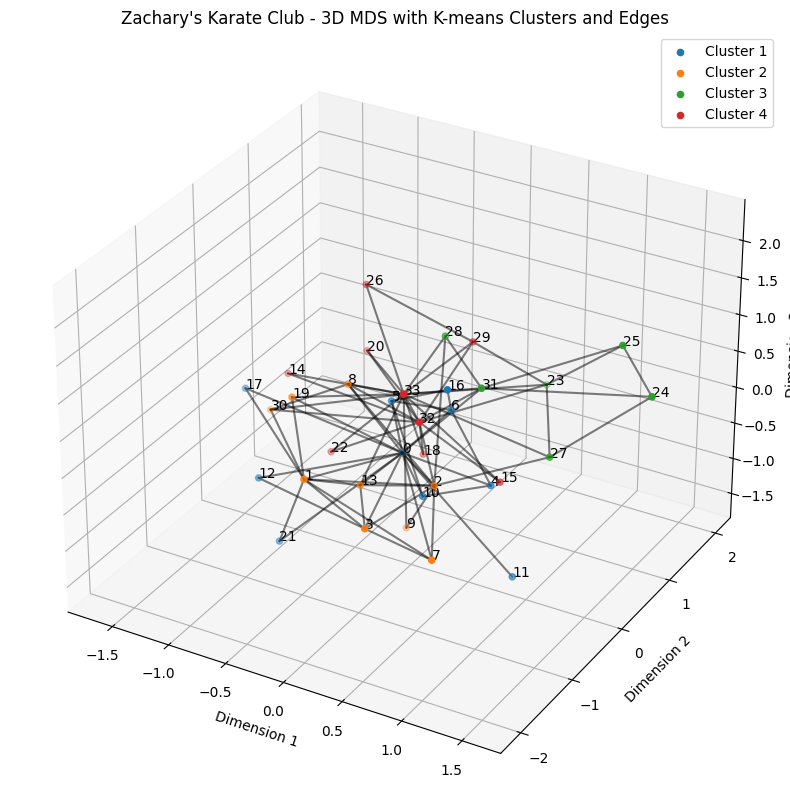

In [9]:
# Create a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot edges
for edge in G.edges():
    start_pos, end_pos = X_3[edge[0]], X_3[edge[1]]
    ax.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], [start_pos[2], end_pos[2]], 'k-', alpha=0.5)

# Plot the nodes with colors based on their cluster
for i in range(k):
    # Extract the indices of nodes in this cluster
    indices = [index for index, cluster_id in enumerate(clusters_3d) if cluster_id == i]
    # Extract the positions of these nodes
    cluster_positions = X_3[indices, :]
    ax.scatter(cluster_positions[:, 0], cluster_positions[:, 1], cluster_positions[:, 2], label=f'Cluster {i+1}')

# Annotate the nodes with their labels
for i, txt in enumerate(G.nodes()):
    ax.text(X_3[i, 0], X_3[i, 1], X_3[i, 2], '%s' % (txt), size=10, zorder=1)

ax.set_title("Zachary's Karate Club - 3D MDS with K-means Clusters and Edges")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
ax.legend()

plt.show()

In what follows, we aim to find the optimal number of communities using the shortest-path distance matrix and MDS. To do so, we run a loop in which we try to split the graph using K communities, where K goes from 2 to 10. For each value of K, we create a K-1 dimensional embedding using MDS. Then, we cluster the nodes using K-means and evaluate the quality of the partition using the modularity function.

In [11]:
# Assuming M is the shortest-path distance matrix from the previous part
N = len(G.nodes())  # Number of nodes in the graph

modularity_scores = []
optimal_k = 2
max_modularity = -np.inf

for k in range(2, 11):
    mds = MDS(n_components=k-1, dissimilarity='precomputed', random_state=42, normalized_stress='auto')
    mds_embedding = mds.fit_transform(M)

    # Clustering within the MDS embedding
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(mds_embedding)  # Corrected this line
    labels = kmeans.labels_

    # Construct a new graph based on the clustering to compute modularity
    G_new = nx.Graph()
    G_new.add_nodes_from(G.nodes())
    for i, node in enumerate(G.nodes()):
        G_new.nodes[node]['community'] = labels[i]

    # Create a list of sets for communities
    communities = []
    for i in range(k):
        communities.append(set([n for n in G_new.nodes if G_new.nodes[n]['community'] == i]))

    # Compute modularity
    current_modularity = modularity(G, communities)
    modularity_scores.append(current_modularity)

    # Update optimal_k if current modularity is greater than max_modularity
    if current_modularity > max_modularity:
        max_modularity = current_modularity
        optimal_k = k

print(f"Optimal number of communities: {optimal_k}, with modularity: {max_modularity}")


Optimal number of communities: 3, with modularity: 0.41401023219205035


Plot the evolution of the modularity score as a function of K, the number of clusters...

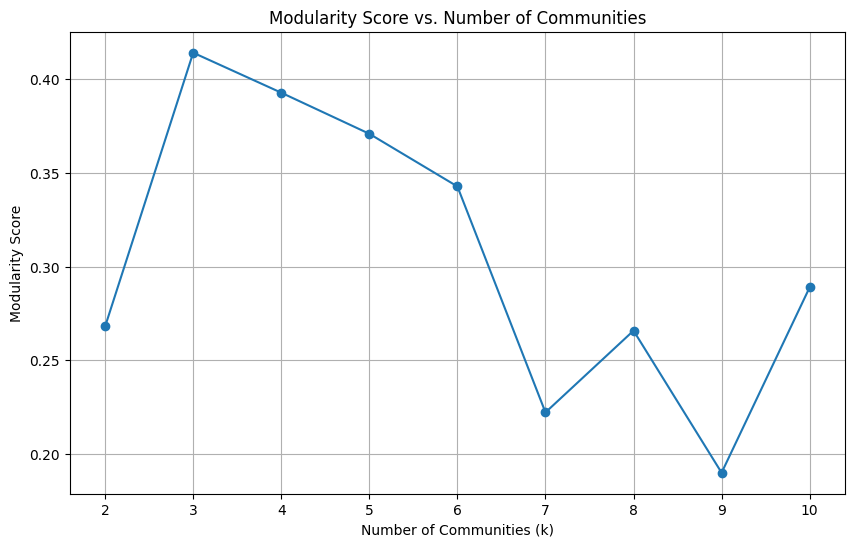

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
# Continue from the previous code snippet
# Assuming modularity_scores, and optimal_k are obtained from the previous steps

# Plot the evolution of the modularity function as a function of k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), modularity_scores, marker='o')
plt.xlabel('Number of Communities (k)')
plt.ylabel('Modularity Score')
plt.title('Modularity Score vs. Number of Communities')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# Plot the final graph embedding for the optimal number of communities
# Re-run MDS and KMeans for optimal_k to get the final embedding and labels
mds = MDS(n_components=optimal_k-1, dissimilarity='precomputed', random_state=42, normalized_stress='auto')
optimal_mds_embedding = mds.fit_transform(M)
kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(optimal_mds_embedding)
final_labels = kmeans.labels_

The optimal partition contains three communities, plotted below...

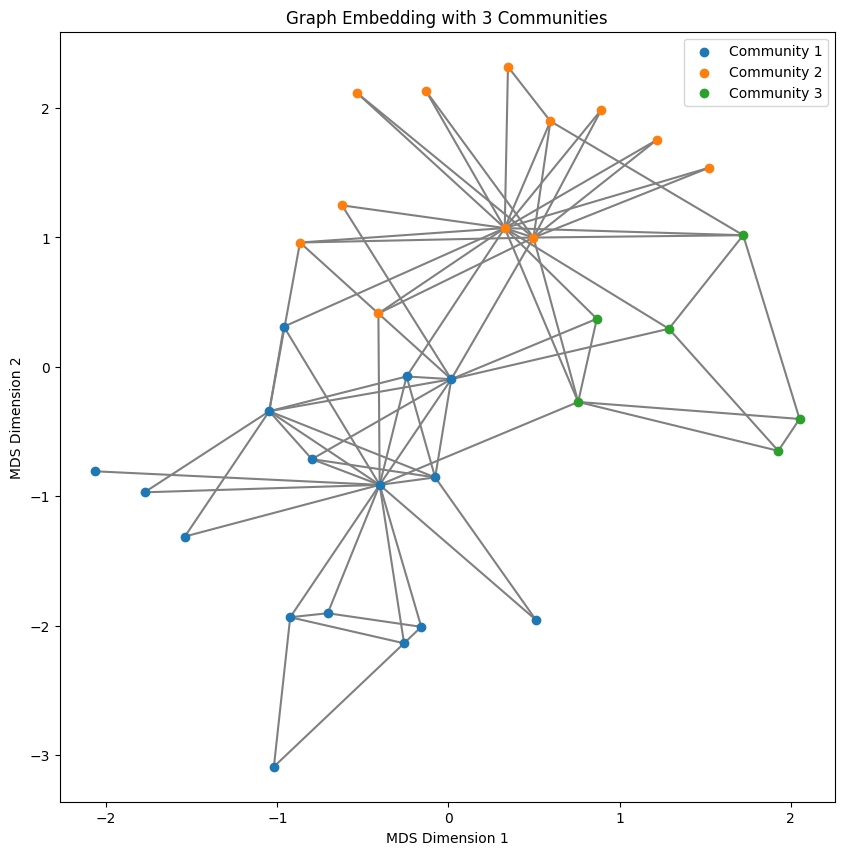

In [13]:
# Plotting
plt.figure(figsize=(10, 10))

# Plot edges first, in gray
for edge in G.edges():
    points = optimal_mds_embedding[[edge[0], edge[1]]]
    plt.plot(points[:, 0], points[:, 1], 'gray', zorder=1)

# Plot nodes, colored by their community
for i in range(optimal_k):
    # Extract nodes belonging to the current cluster
    cluster_nodes = optimal_mds_embedding[final_labels == i]
    plt.scatter(cluster_nodes[:, 0], cluster_nodes[:, 1], label=f'Community {i+1}', zorder=2)

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title(f'Graph Embedding with {optimal_k} Communities')
plt.legend()
plt.show()